# 1. Dependencies
To run the rest of the notebook and our project you need the following packages. Don't forget to put the files in `src` folder beside this notebook. Also the maps used in our experiments are provided in OSF.

In [ ]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install mrcfile
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install Pillow
!{sys.executable} -m pip install POT
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install numba
!{sys.executable} -m pip install Bio
!{sys.executable} -m pip install tornado==4.5.3
!pip freeze

In [1]:
from empot import *

In [2]:
plt.rcParams["figure.figsize"] = (20,20)

# 2. Run the method
First we choose out most important hyper parameter, i.e. number of sampled points.

In [15]:
n_points = 2000
n_comb = 2

Now as the first step of the alignment we convert the first map to a point cloud. First parameter is the map address, and the second one is the thresholding value used to reduce noise before applying TRN.

In [16]:
x, y, z = sample('/u01/project/chenwei-embuild/embuild_docker/maps/reg_mcp/0346_mcp.mrc', 3.13, n_points, random_seed=42)


(272, 272, 272)


Now to convert the second map and align we can use the following function. This function can potentialy get more than one density map for the case that we are not sure about the shape of second map, i.e. getting multiple outputs from Alphafold. Each map is passed via a triple (map address, thresholding value, pdb structure address). Also `num` is the number of alignment find by EMPOT.

(130, 130, 130)
0


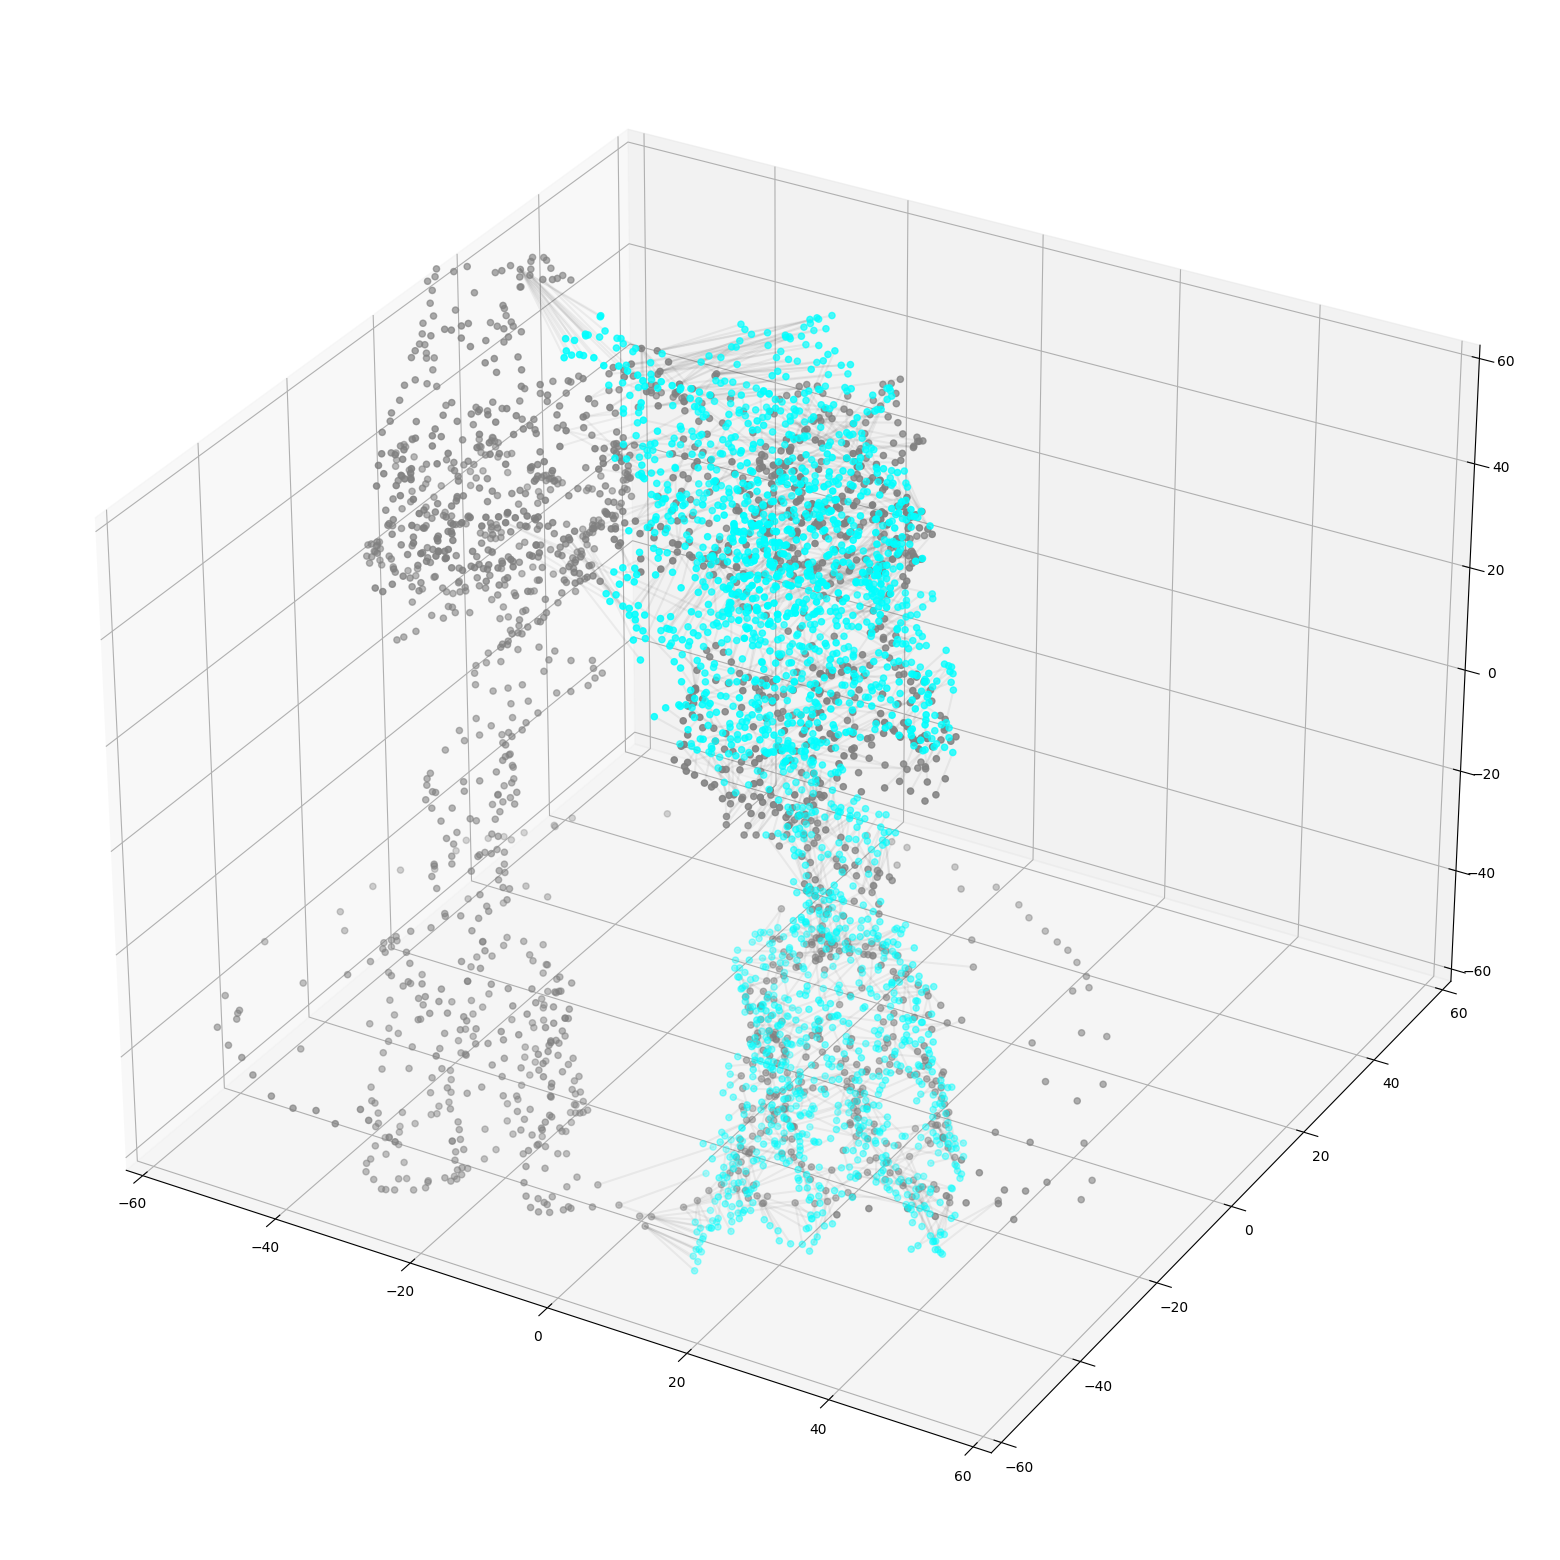

In [17]:
a1 = align_substruct(x, y, z, [('./6n52/chainA.mrc', 0.115, './6n52/chain_A.pdb')], num=n_comb, num_points=n_points)

Now we should repeat the previous step for each chain in the map and then combine all aligned substructures together using the following function. This function get a list consisting the output of previous step for each substructure. As this example (PDB:6N52) consists of two identical chains we can reuse the alignment found above.

In [ ]:
alignments = choose_alignments(x, y, z, [a1, a1], verbose=False)

Finally, we build the reconstructed atomic structure by the following function.

In [19]:
generate_pdbs('/u01/project/chenwei-embuild/embuild_docker/maps/ref_map/emd_0346.map', alignments, f'./6n52/6n52-{n_points}-{n_comb}-')

./6n52/chain_A.pdb
./6n52/chain_A.pdb
